In [219]:
# 목차

#1. 스티커 구하거나 만들기
#2. 얼굴 검출 혹은 랜드마크 검출하기 (눈, 코, 입 얼굴 인식)
    #라이브러 dlib 사용
    #얼굴의 bounding box 위치 및 landmark 위치 찾기
#3. 스티커 적용하기 위치 찾기
#4. 스티커 적용하기
    #np.where을 사용해서 스티커 적용
    #스티커 뒤로 원본 이미지가 같이 보이게 만들기: opencv 의 cv2.addWeighted() 사용
#5. 회고

import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

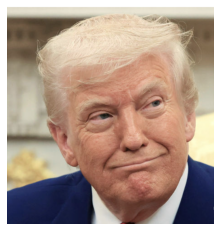

In [220]:
# 이미지 경로 설정 및 로딩
my_image_path = os.path.expanduser('~/aiffel/camera_sticker/images/trump.png')
img_bgr = cv2.imread(my_image_path)
if img_bgr is None:
    print("이미지를 불러오지 못했습니다. 경로를 다시 확인하세요.")
else:
    img_show = img_bgr.copy()
    plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()


In [221]:
# 얼굴 검출
detector_hog = dlib.get_frontal_face_detector()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)
print("Go")

Go


In [222]:
# 랜드마크 모델 불러오기
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("Go")

Go


In [223]:
# 랜드마크 추출
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
print("Go")

Go


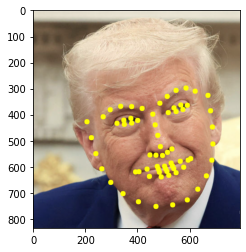

In [224]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 10, (0, 255, 255), -1)
        
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

rectangles[[(245, 246) (707, 708)]]


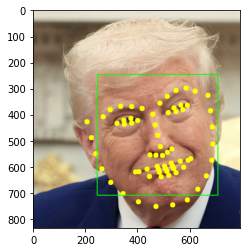

In [225]:
# 찾는 얼굴을 화면에 출력
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [226]:
# 스티커 경로 설정 및 로딩
sticker_path = os.path.expanduser('~/aiffel/camera_sticker/images/cat.png')
img_sticker = cv2.imread(sticker_path)

# === 핵심 수정 파트 ===
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x, y = landmark[30]  # 🔥 코 중심 (index 30)

    w = dlib_rect.width()
    h = dlib_rect.width()

    img_sticker_resized = cv2.resize(img_sticker, (w, h), interpolation=cv2.INTER_AREA)

    # 코 중앙 기준으로 위치 조정
    refined_x = x - w // 2
    refined_y = y - h // 2

    # 이미지 경계 벗어나는 경우를 대비해 clipping
    if refined_x < 0: refined_x = 0
    if refined_y < 0: refined_y = 0
    if refined_x + img_sticker_resized.shape[1] > img_bgr.shape[1]:
        img_sticker_resized = img_sticker_resized[:, :img_bgr.shape[1] - refined_x]
    if refined_y + img_sticker_resized.shape[0] > img_bgr.shape[0]:
        img_sticker_resized = img_sticker_resized[:img_bgr.shape[0] - refined_y, :]

    #스티커 붙이기
    sticker_area = img_bgr[refined_y:refined_y+img_sticker_resized.shape[0], refined_x:refined_x+img_sticker_resized.shape[1]]
    img_bgr[refined_y:refined_y+img_sticker_resized.shape[0], refined_x:refined_x+img_sticker_resized.shape[1]] = \
        np.where(img_sticker_resized==255, sticker_area, img_sticker_resized).astype(np.uint8)
    
    print ("Go")

Go


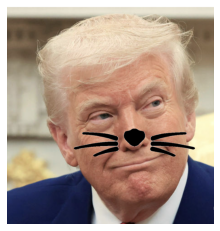

In [227]:
# 최종 결과 출력
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

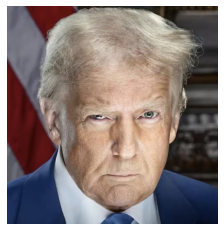

In [228]:
# 이미지 경로 설정 및 로딩
# 이미지 경로 설정 및 로딩
my_image_path = os.path.expanduser('~/aiffel/camera_sticker/images/trumpfront.png')
img_bgr = cv2.imread(my_image_path)
if img_bgr is None:
    print("이미지를 불러오지 못했습니다. 경로를 다시 확인하세요.")
else:
    img_show = img_bgr.copy()
    plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()


In [229]:
# 얼굴 검출
detector_hog = dlib.get_frontal_face_detector()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)
print("Go")

Go


In [230]:
# 랜드마크 모델 불러오기
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("Go")

Go


In [231]:
# 랜드마크 추출
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
print ('GO')

GO


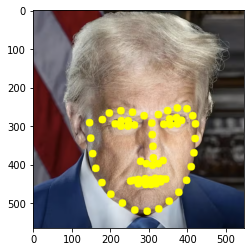

In [232]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 10, (0, 255, 255), -1)
        
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

rectangles[[(171, 231) (438, 498)]]


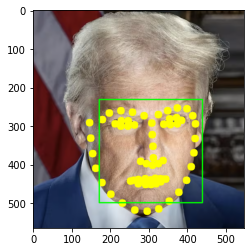

In [233]:
# 찾는 얼굴을 화면에 출력
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [234]:
# 스티커 경로 설정 및 로딩
sticker_path = os.path.expanduser('~/aiffel/camera_sticker/images/cat.png')
img_sticker = cv2.imread(sticker_path)

# === 핵심 수정 파트 ===
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x, y = landmark[30]  # 🔥 코 중심 (index 30)

    w = dlib_rect.width()
    h = dlib_rect.width()

    img_sticker_resized = cv2.resize(img_sticker, (w, h), interpolation=cv2.INTER_AREA)

    # 코 중앙 기준으로 위치 조정
    refined_x = x - w // 2
    refined_y = y - h // 2

    # 이미지 경계 벗어나는 경우를 대비해 clipping
    if refined_x < 0: refined_x = 0
    if refined_y < 0: refined_y = 0
    if refined_x + img_sticker_resized.shape[1] > img_bgr.shape[1]:
        img_sticker_resized = img_sticker_resized[:, :img_bgr.shape[1] - refined_x]
    if refined_y + img_sticker_resized.shape[0] > img_bgr.shape[0]:
        img_sticker_resized = img_sticker_resized[:img_bgr.shape[0] - refined_y, :]

    #스티커 붙이기
    sticker_area = img_bgr[refined_y:refined_y+img_sticker_resized.shape[0], refined_x:refined_x+img_sticker_resized.shape[1]]
    img_bgr[refined_y:refined_y+img_sticker_resized.shape[0], refined_x:refined_x+img_sticker_resized.shape[1]] = \
        np.where(img_sticker_resized==255, sticker_area, img_sticker_resized).astype(np.uint8)
    
    print ("Go")

Go


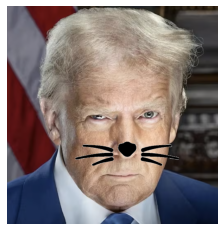

In [235]:
# 최종 결과 출력
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

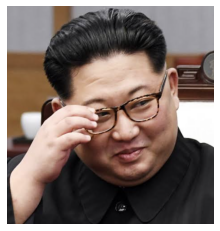

In [236]:
# 이미지 경로 설정 및 로딩
my_image_path = os.path.expanduser('~/aiffel/camera_sticker/images/kim.png')
img_bgr = cv2.imread(my_image_path)
if img_bgr is None:
    print("이미지를 불러오지 못했습니다. 경로를 다시 확인하세요.")
else:
    img_show = img_bgr.copy()
    plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

In [237]:
# 얼굴 검출
detector_hog = dlib.get_frontal_face_detector()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)
print("Go")

Go


In [238]:
# 랜드마크 모델 불러오기
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("Go")

Go


In [239]:
# 랜드마크 추출
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
print("Go")

Go


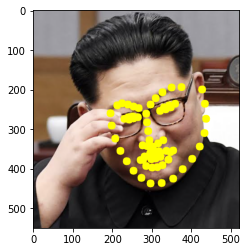

In [240]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 10, (0, 255, 255), -1)
        
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

rectangles[[(171, 171) (438, 439)]]


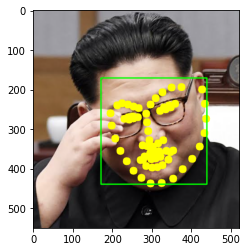

In [241]:
# 찾는 얼굴을 화면에 출력
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [242]:
# 스티커 경로 설정 및 로딩
sticker_path = os.path.expanduser('~/aiffel/camera_sticker/images/cat.png')
img_sticker = cv2.imread(sticker_path)

# === 핵심 수정 파트 ===
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x, y = landmark[30]  # 🔥 코 중심 (index 30)

    w = dlib_rect.width()
    h = dlib_rect.width()

    img_sticker_resized = cv2.resize(img_sticker, (w, h), interpolation=cv2.INTER_AREA)

    # 코 중앙 기준으로 위치 조정
    refined_x = x - w // 2
    refined_y = y - h // 2

    # 이미지 경계 벗어나는 경우를 대비해 clipping
    if refined_x < 0: refined_x = 0
    if refined_y < 0: refined_y = 0
    if refined_x + img_sticker_resized.shape[1] > img_bgr.shape[1]:
        img_sticker_resized = img_sticker_resized[:, :img_bgr.shape[1] - refined_x]
    if refined_y + img_sticker_resized.shape[0] > img_bgr.shape[0]:
        img_sticker_resized = img_sticker_resized[:img_bgr.shape[0] - refined_y, :]

    #스티커 붙이기
    sticker_area = img_bgr[refined_y:refined_y+img_sticker_resized.shape[0], refined_x:refined_x+img_sticker_resized.shape[1]]
    img_bgr[refined_y:refined_y+img_sticker_resized.shape[0], refined_x:refined_x+img_sticker_resized.shape[1]] = \
        np.where(img_sticker_resized==255, sticker_area, img_sticker_resized).astype(np.uint8)
    
    print ("Go")

Go


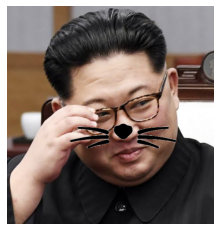

In [243]:
# 최종 결과 출력
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()